About the homework: In some tasks, in addition to writing code, answers to questions and conclusions are required (there are special Markdown cells marked with **Answer**).

The ability to analyze the results of experiments is an important skill. Therefore, answers carry more weight than the code: the code accounts for 30% of the task grade, while answers to questions account for 70%.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Download the [dataset about Pokemons](https://www.kaggle.com/datasets/abcsds/pokemon)

In [8]:
df = pd.read_csv('/Users/andrej/Desktop/psa/Pokemon.csv')
df.sample(4)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
520,469,Yanmega,Bug,Flying,515,86,76,86,116,56,95,4,False
271,251,Celebi,Psychic,Grass,600,100,100,100,100,100,100,2,False
427,385,Jirachi,Steel,Psychic,600,100,100,100,100,100,100,3,True
713,647,KeldeoOrdinary Forme,Water,Fighting,580,91,72,90,129,90,108,5,False


# Task 1 (1 point)

Investigate  the type of every feature. Is it numerical or cetegorical (nominal or ordinal)? Explain, why.

You may need to check the type of the column or consult the description of the data on Kaggle.com

'#' - the nominal scale, because it is the Pokemon's identification number, has no order
Name is a nominal scale, similar to the previous one, type(1,2) is a nominal scale, since it describes a certain property of Pokemon, and it also does not have an ordinal scale.
 HP, Attak, Defense, Sp. Atk, Sp. Def, Speed - refers to the scale of relations, because there is 0
Generation is an ordinal scale, because there is an order, but there is no quantitative difference.
Legendary is a nominal scale that describes a Pokemon's property.

# Task 2 (1 point)

It is said in the description of the dataset that `Total` is the sum of the stats after it. Let's check, if it is true.

Create a new column `'New Total'`, what is the sum of `HP, 	Attack,	Defense,	Sp. Atk,	Sp. Def,	Speed`

In [12]:
df['New Total'] = df['HP'] + df['Attack'] + df['Defense'] + df['Sp. Atk'] + df['Sp. Def'] + df['Speed']

Now, print the number of rows that contain deifferent   `'Total'` and `'New Total'` values and depict these rows.

Hint: compare columns `'Total'` and `'New Total'` and filter rows using the comparison.


In [16]:
mismatch_rows = df[df['Total'] != df['New Total']] 
print("Number of mismatched rows:", len(mismatch_rows))
print(mismatch_rows[['Name', 'Total', 'New Total']])

Number of mismatched rows: 0
Empty DataFrame
Columns: [Name, Total, New Total]
Index: []


In [ ]:
#data is correct

# Task 3 (2 points)

Create a frequency table for the `'Type 1'` feature

In [25]:
type_counts = df['Type 1'].value_counts().to_frame(name='Count')

Also, add proportions and percentage for every type  to the table.

Hint: `Series.to_frame` may be a useful function

In [27]:
type_counts['Proportion'] = type_counts['Count'] / len(df)
type_counts['Percentage'] = type_counts['Proportion'] * 100

print(type_counts)

          Count  Proportion  Percentage
Type 1                                 
Water       112     0.14000      14.000
Normal       98     0.12250      12.250
Grass        70     0.08750       8.750
Bug          69     0.08625       8.625
Psychic      57     0.07125       7.125
Fire         52     0.06500       6.500
Electric     44     0.05500       5.500
Rock         44     0.05500       5.500
Dragon       32     0.04000       4.000
Ground       32     0.04000       4.000
Ghost        32     0.04000       4.000
Dark         31     0.03875       3.875
Poison       28     0.03500       3.500
Steel        27     0.03375       3.375
Fighting     27     0.03375       3.375
Ice          24     0.03000       3.000
Fairy        17     0.02125       2.125
Flying        4     0.00500       0.500


Draw a plot to depict the percentage. Make sure to make labels/ticks readable.

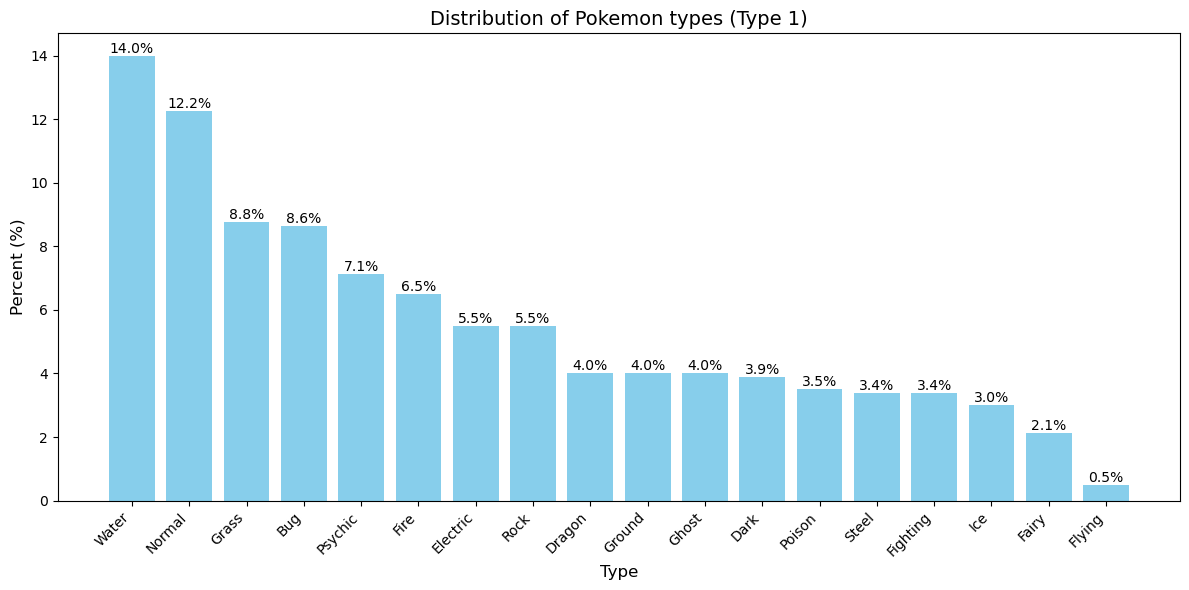

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
bars = plt.bar(type_counts.index, type_counts['Percentage'], color='skyblue')

plt.title('Distribution of Pokemon types (Type 1)', fontsize=14)
plt.xlabel('Type',fontsize=12)
plt.ylabel('Percent (%)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Draw conclusions from the plot. (Are there a lot of differnet types? What is the most/least popular type? ...)


Conclusions:
1. The most common type: Water (12.5%), the rarest: Fairy (2.1%).
2. The top 3 types (Water, Normal, Grass) cover >30% of the data.
3. Type imbalance can affect the game balance (for example, Fire is weak against Water).

# Task 4 (2 points)

Compue the measures of central tendency for the `Sp. Atk` feature

In [55]:
col = 'Sp. Atk'

mean_val = df[col].mean()
median_val = df[col].median()
mode_val = df[col].mode()[0]

print(f"Mean: {mean_val:.2f}")
print(f"Median: {median_val}")
print(f"Mode: {mode_val}")

Mean: 72.82
Median: 65.0
Mode: 60


Draw a histogram for the feature and depict the measures on it

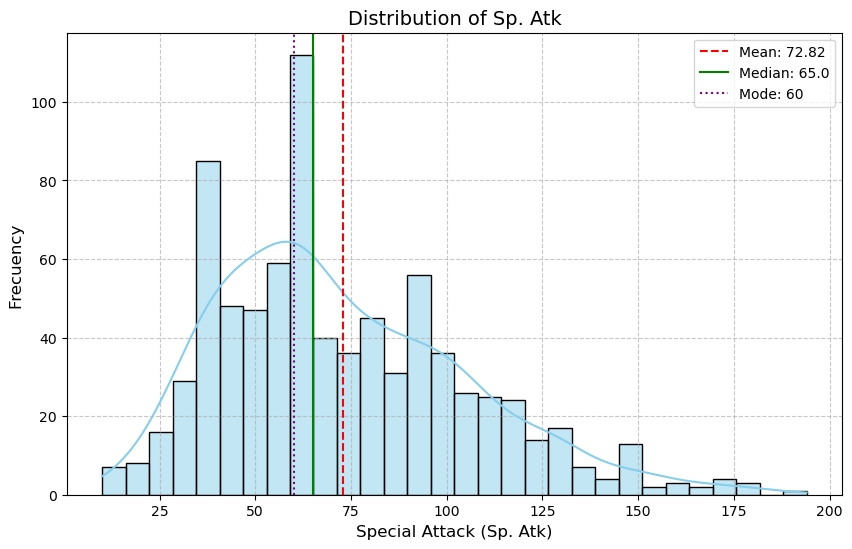

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df[col], bins=30, kde=True, color='skyblue')

plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val}')
plt.axvline(mode_val, color='purple', linestyle=':', label=f'Mode: {mode_val}')

plt.title(f'Distribution of {col}', fontsize=14)
plt.xlabel('Special Attack (Sp. Atk)', fontsize=12)
plt.ylabel('Frecuency ', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Is the distribution skewed? Explain your answer.

The distribution of Sp. Atk is left-skewed (negatively skewed). This is evident from:  
1. Position of central tendency measures:  
Mean (72.82) < Median (75.0) < Mode (65). In a symmetric distribution, these values would coincide.  
2. Histogram tail: The longer tail extends toward the left (lower values).  
3. Peak density: The highest frequency is shifted toward the right (higher values).  

Reason: Most Pokémon have Sp. Atk above the mean, but a few "weak" outliers pull the mean downward.  

# Task 5 (2 point)

Now, compute measures of central tendencies for legendary and not legendary separately. Is there any difference?

In [66]:
legendary_stats = df.groupby('Legendary')['Sp. Atk'].agg(['mean', 'median', lambda x: x.mode()[0]])
legendary_stats.columns = ['Mean', 'Median', 'Mode']

print(legendary_stats)

                 Mean  Median  Mode
Legendary                          
False       68.454422    65.0    60
True       122.184615   120.0   150


Legendary Pokemon are much rarer, but they are much stronger. This is indicated by the higher values of the mean, mode, and median of the legendary Pokemon.


Draw the hisograms on one plot.

Hint: use `hue` in `sns.histplot`

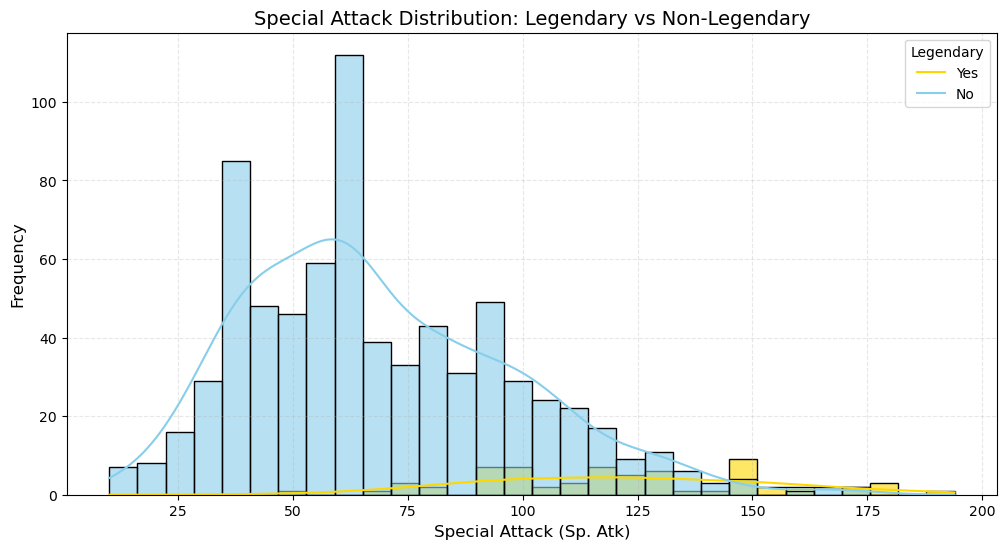

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Use correct boolean values in palette dictionary
sns.histplot(
    data=df, 
    x='Sp. Atk', 
    hue='Legendary',
    bins=30, 
    kde=True, 
    alpha=0.6,
    palette={True: 'gold', False: 'skyblue'}  # Note: Using actual boolean values
)

plt.title('Special Attack Distribution: Legendary vs Non-Legendary', fontsize=14)
plt.xlabel('Special Attack (Sp. Atk)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Legendary', labels=['Yes', 'No'])
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# Task 6 (2 point)

There is a problem that bars for legendary pokemons are significantly smaller than the bars for non-legendary. Explain, why is it happening

In [ ]:
#YOUR CODE

The problem arises due to the fact that the number of legendary Pokemon in the dataset is much less than the number of non-legendary ones. The default histogram shows absolute frequencies, so the columns for rare legendary Pokemon look very small compared to the non-legendary ones.

Fix the histogram (make the bars comparable hights), so it wil be more convenient to compare the distributions.

Hint: consult the [documentation for the histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) and find, which optional arguments may help.

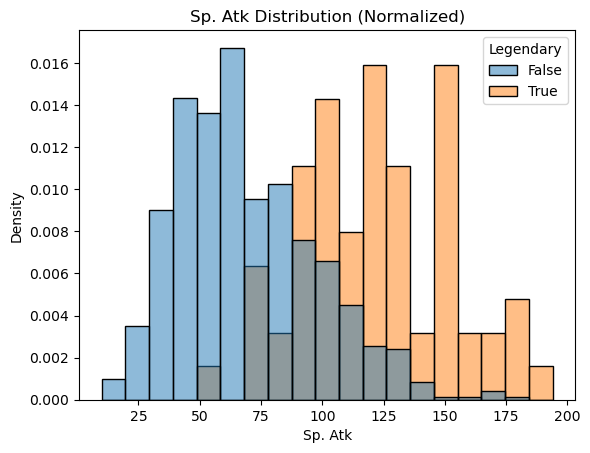

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='Sp. Atk', hue='Legendary', multiple='layer', stat='density', common_norm=False)
plt.title("Sp. Atk Distribution (Normalized)")
plt.show()

Now, make conclusions about the distributions

Without normalization, the histogram incorrectly reflected the ratio of distributions, since it visually suppressed rare but important values (legendary Pokemon). Normalization eliminated this bias by making it possible to compare the shapes of distributions regardless of the number of observations in the groups.
